 The average of all ages is 39.21
 The different regions in this dataset consist of ['northwest', 'southwest', 'southeast', 'northeast']
 The number of people from southwest is 325 
 The number of people from northwest is 325 
 The number of people from southeast is 364 
 And the number of people from northeast is 324 
 Therefore, the region with the highest population is South East and its value is 364


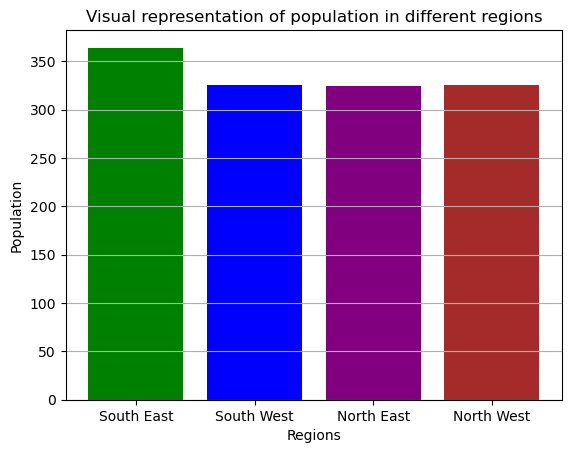

The total sum of charges who are smokers is 8781763.52184
The total sum of charges who are non-smokers is 8974061.468918996
The average cost of insurance for smokers from this dataset is 32050.23183153284
The average cost of insurance for non-smokers from this dataset is 8434.268297856204


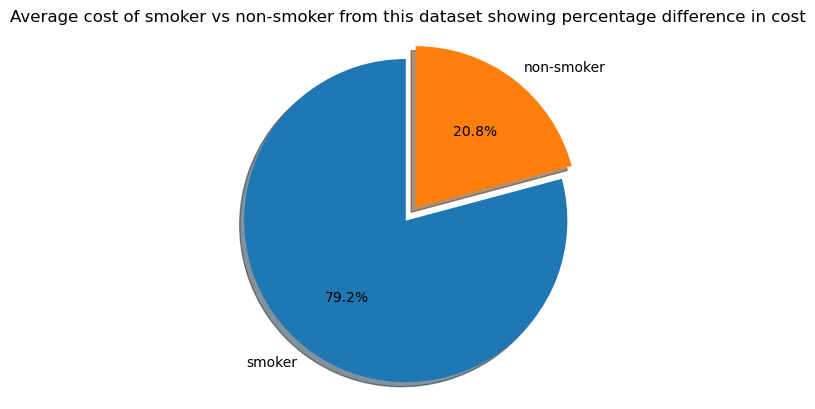

 The average of all charges is 13270.422265141257
 The total number of males in this dataset is 676 and the total number of females in this dataset is 662
This is a unique number of children an individual has in the dataset 0
This is a unique number of children an individual has in the dataset 1
This is a unique number of children an individual has in the dataset 2
This is a unique number of children an individual has in the dataset 3
This is a unique number of children an individual has in the dataset 4
This is a unique number of children an individual has in the dataset 5
The total cost for having 0 children is 7098069.995338997
The total cost for having 1 children is 4124899.673449997
The total cost for having 2 children is 3617655.296149999
The total cost for having 3 children is 2410784.983589999
The total cost for having 4 children is 346266.40777999995
The total cost for having 5 children is 158148.63445
There are 764 number of individuals with a child in this dataset.
There are

In [68]:
import csv
import numpy 
import matplotlib.pyplot as plt
from collections import defaultdict
#save ages to a list and then calculate average ages
#save regions to a list

ages=[]
region=[]
smoker=[]
children=[]
charges=[]
bmis=[]
sex=[]

def load_data(file_name,lst,column_name):

    with open (file_name) as insurance_file:
        insurance_reader = csv.DictReader(insurance_file)
        for row in insurance_reader:
            lst.append(row[column_name])
        return lst
            
# look at the data in insurance_csv_dict
load_data(lst = ages, file_name = 'insurance.csv', column_name = 'age')
load_data(lst = sex, file_name = 'insurance.csv', column_name ='sex')
load_data(lst = bmis, file_name = 'insurance.csv', column_name ='bmi')
load_data(lst = children,file_name = 'insurance.csv',column_name = 'children')
load_data(lst = smoker, file_name = 'insurance.csv', column_name ='smoker')
load_data(lst = region, file_name = 'insurance.csv',column_name = 'region')
load_data(lst = charges,file_name =  'insurance.csv', column_name ='charges')

class PatientInfo:
    # init method that takes in each list parameter
    def __init__(self, patients_ages, patients_sexes, patients_bmis, patients_num_children, 
                 patients_smoker_statuses, patients_regions, patients_charges):
        self.patients_ages = patients_ages
        self.patients_sexes = patients_sexes
        self.patients_bmis = patients_bmis
        self.patients_num_children = patients_num_children
        self.patients_smoker_statuses = patients_smoker_statuses
        self.patients_regions = patients_regions
        self.patients_charges = patients_charges
        
    def average_age(self):
               
        #convert list of strings to integer
        agesint = [eval(i) for i in ages]
        #print(agesint)

        #calculate average of ages
        ages_avg = numpy.average(agesint)
        rounded_ages_avg = ages_avg.round(2)
        print (" The average of all ages is", rounded_ages_avg)
        
    def avg_charges(self):
        chargesint = [eval(i) for i in charges]
        
        charges_avg = numpy.average(chargesint)
        print (" The average of all charges is", charges_avg)
        
    
    def region(self):
        uniquelist = list(set(region))
        print(" The different regions in this dataset consist of" ,uniquelist)
        #calculate majority of region
        
        southeastcount = 0
        southwestcount = 0
        northeastcount = 0
        northwestcount = 0

        for index in region:
            if index == "southwest":
                southwestcount += 1
            elif index == "southeast":
                southeastcount += 1
            elif index == "northeast":
                northeastcount += 1
            elif index == "northwest":
                northwestcount += 1
        #key parameter set to a lambda function that returns the second element of each tuple (the value). 
        #This lambda function ensures that the maximum value is compared and determined correctly.

        regions = [("South East",southeastcount),("South West", southwestcount),("North East", northeastcount),("North West", northwestcount)]

        max_region = max(regions, key = lambda x: x[1])
        variable_name, variable_value = max_region


        print(" The number of people from southwest is", southwestcount, "\n", "The number of people from northwest is", northwestcount, "\n",
              "The number of people from southeast is", southeastcount, "\n", "And the number of people from northeast is", northeastcount, "\n"
              " Therefore, the region with the highest population is", variable_name, "and its value is", variable_value)
        #Create graph visualisng the regions
        # Extract variable names from the list of tuples for x axis
        x_axis = [tup[0] for tup in regions]
        # Extract variable values from the list of tuplesfor y axis
        y_axis = [values[1] for values in regions]
        colours = ['green', 'blue', 'purple', 'brown']
        plt.bar(x_axis, y_axis, color = colours)
        plt.title('Visual representation of population in different regions')
        plt.xlabel('Regions')
        plt.ylabel('Population')
        plt.grid(axis ="y")
        plt.show()
        
    def smoker_cost(self):
        
        resultdict = defaultdict(list)
        for key, value in zip(smoker,charges):
            resultdict[key].append(value)
        
        
        new_dict = {key: [float(value) for value in values] for key, values in resultdict.items()}
        #print(new_dict)
        
        #print(new_dict["yes"])
        totalyes = sum(new_dict["yes"])
        print("The total sum of charges who are smokers is", totalyes)
        totalno = sum(new_dict["no"])
        print("The total sum of charges who are non-smokers is", totalno)
        
        totalyesavg = numpy.average(new_dict["yes"])
        totalnoavg = numpy.average(new_dict["no"])
        print("The average cost of insurance for smokers from this dataset is", totalyesavg)
        
        print("The average cost of insurance for non-smokers from this dataset is", totalnoavg)
        
        # Pie chart, where the slices will be ordered and plotted counter-clockwise:
        labels = 'smoker', 'non-smoker'
        sizes = [totalyesavg, totalnoavg]
        explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

        fig1, ax1 = plt.subplots()
        ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                shadow=True, startangle=90)
        ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.title("Average cost of smoker vs non-smoker from this dataset showing percentage difference in cost")

        plt.show()
        
    def genderdiff(self):
        totalmale = 0
        totalfemale = 0 
        for index in sex:
            if index == "male":
                totalmale += 1
            elif index == "female":
                totalfemale += 1
        print(" The total number of males in this dataset is", totalmale, "and the total number of females in this dataset is", totalfemale)

    def childcost(self):
        children_cost_int = [eval(i) for i in children]
        #print(children_cost_int)
        chargesint = [eval(i) for i in charges]
        
        # defaultdict allows you to have a default value for a key that doesn't exist in the dictionary.     
        resultdict2 = defaultdict(list)
        for key, value in zip(children_cost_int,chargesint):
            resultdict2[key].append(value)
            
        #Obtain unique number of children in dataset
        uniquekeys = set(resultdict2.keys())
        
        for i in uniquekeys:
            print("This is a unique number of children an individual has in the dataset", i)
            

        
        cost_children = [0] * 6
        
   
        for key, value in resultdict2.items():
            cost_children[key] = sum(value)


        for index, cost in enumerate(cost_children):
            print("The total cost for having", index, "children is", cost)
     
        count_with_child=0
        count_without_child=0
       
        for key, value in resultdict2.items():
            if key != 0:
                count_with_child += len(value)
            
            
            elif key == 0:
                count_without_child += len(value)
                
        
        print("There are",count_with_child,"number of individuals with a child in this dataset.")
        print("There are",count_without_child,"number of individuals without a child in this dataset.")       
                
        total_cost_with_children = sum(cost_children[i] for i in [1,2,3,4,5])
        total_cost_without_children = sum(cost_children[i] for i in [0])
        avg_cost_with_children = total_cost_with_children/count_with_child
        avg_cost_without_children = total_cost_without_children/count_without_child
        
        print("The average cost when an individual has a child from this dataset is", avg_cost_with_children)
        print("The average cost when an individual doesn't have a child from this dataset is", avg_cost_without_children)
        return count_with_child
         # Pie chart, where the slices will be ordered and plotted counter-clockwise:
        labels = 'with children', 'without children'
        sizes = [avg_cost_with_children, avg_cost_without_children]
        explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

        fig1, ax1 = plt.subplots()
        ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                shadow=True, startangle=90)
        ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.title("Average cost of having a child from this dataset showing percentage difference in cost")

        plt.show()
 

    def avgage(self):
        
        age_int = [eval(i) for i in ages]
        children_int = [eval(i) for i in children]
        
        # defaultdict allows you to have a default value for a key that doesn't exist in the dictionary.     
        resultdict3 = defaultdict(list)
        
     
        for key, value in zip(children_int,age_int):
            resultdict3[key].append(value)

        combined_values = []
        for value in resultdict3.values():
            combined_values.extend(value)

        average = numpy.average(combined_values)

        print("The average age for a person who has at least one child in this dataset is",average)
 # method to create dictionary with all patients information
    def create_dictionary(self):
        self.patients_dictionary = {}
        self.patients_dictionary["age"] = [int(age) for age in self.patients_ages]
        self.patients_dictionary["sex"] = self.patients_sexes
        self.patients_dictionary["bmi"] = self.patients_bmis
        self.patients_dictionary["children"] = self.patients_num_children
        self.patients_dictionary["smoker"] = self.patients_smoker_statuses
        self.patients_dictionary["regions"] = self.patients_regions
        self.patients_dictionary["charges"] = self.patients_charges
        return self.patients_dictionary        
       

            
    
        
patient_info = PatientInfo(ages,sex,bmis,children,smoker,region,charges)
patient_info.average_age()
patient_info.region()
patient_info.smoker_cost()
patient_info.avg_charges()
patient_info.genderdiff()
patient_info.childcost()
patient_info.avgage()
#patient_info.create_dictionary()